In [1]:
library(rGADEM)
library(BSgenome.Hsapiens.UCSC.hg38)
library(GenomicRanges)
library(rtracklayer)
library(Biostrings)

Loading required package: Biostrings

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: XVector

Loading req

In [2]:
# list.files()

down = import("the.matrix.peaks_and_counts.method1.combined_peak_DESeq2_results.SVA.downregulated.padj0.1_log2FC.minus.0.5.bed", format='BED')
up = import("the.matrix.peaks_and_counts.method1.combined_peak_DESeq2_results.SVA.upregulated.padj0.1_log2FC.plus.0.5.bed", format="BED")

length(down)
length(up)

# Print initial statistics
cat("Initial peak counts:\n")
cat("Downregulated peaks:", length(down), "\n")
cat("Upregulated peaks:", length(up), "\n")

# Remove regions that are outside valid chromosome ranges
valid_chromosomes <- paste0("chr", c(1:22, "X", "Y", "M"))

# Extract sequences with bedtools
# bedtools getfasta -fi genome.fa -bed fixed_peaks.bed -fo peaks.fa

[1] 2483

[1] 3432

Initial peak counts:
Downregulated peaks: 2483 
Upregulated peaks: 3432 


In [3]:
# Get sequences directly
down_seq <- getSeq(BSgenome.Hsapiens.UCSC.hg38, down)
up_seq <- getSeq(BSgenome.Hsapiens.UCSC.hg38, up)

# Run GADEM
gadem_down <- GADEM(down_seq, verbose=1, genome=BSgenome.Hsapiens.UCSC.hg38)
gadem_up <- GADEM(up_seq, verbose=1, genome=BSgenome.Hsapiens.UCSC.hg38)

*** Start C Programm ***
input sequence file:  
number of sequences and average length:				2483 483.4
Use pgf method to approximate llr null distribution
parameters estimated from sequences in:  

number of GA generations & population size:			5 100

PWM score p-value cutoff for binding site declaration:		2.000000e-04
ln(E-value) cutoff for motif declaration:			0.000000

number of EM steps:						40
minimal no. sites considered for a motif:			124

[a,c,g,t] frequencies in input data:				0.180486 0.319514 0.319514 0.180486
*** Running an unseeded analysis ***
GADEM cycle  1: enumerate and count k-mers... top 3  4, 5-mers: 20 40 60
Done.
Initializing GA... Done.
GADEM cycle[  1] generation[  1] number of unique motif: 5
   spacedDyad: ttcctnnnnnnnnnnattt  motifConsensus: yyyCyyyyyCyyyCyyyCy   0.80 fitness: -2625.17
   spacedDyad: agaaannnnnnnnnaggaa  motifConsensus: mAAAAAAArAAAAAArrrA   0.10 fitness: -1951.32
   spacedDyad: cctcnnnnnnnnncctcc   motifConsensus: sCCGCCGCCGCCGCCsCC    1.00 f

In [4]:
# str(gadem_down)
# str(gadem_up)

In [5]:
nOccurrences(gadem_down)
consensus(gadem_down)
cat("consensus")
consensus(gadem_down)[1]
consensus(gadem_down)[2]
consensus(gadem_down)[3]
consensus(gadem_down)[4]
consensus(gadem_down)[5]

[1] 3639 1887 2694  530  847

[1] "nrrrrAGrrrGrrrrrGrrrn" "nAAAAAwwAAAAwwrArA"    "sGGsGGCGGCGGCGGsGGs"  
[4] "sCCCAGCCCn"            "sCAGCAGCn"

consensus

[1] "nrrrrAGrrrGrrrrrGrrrn"

[1] "nAAAAAwwAAAAwwrArA"

[1] "sGGsGGCGGCGGCGGsGGs"

[1] "sCCCAGCCCn"

[1] "sCAGCAGCn"

In [6]:
nOccurrences(gadem_up)
consensus(gadem_up)
cat("consensus")
consensus(gadem_up)[1]
consensus(gadem_up)[2]
consensus(gadem_up)[3]
consensus(gadem_up)[4]
consensus(gadem_up)[5]

[1] 3780 2184 2352  993

[1] "nyyTyyyyyTyyyyyTyyyn" "nCyCCrsCyCCn"         "CysCyGCCkCmGCCkCCn"  
[4] "sCAGCCTGGn"

consensus

[1] "nyyTyyyyyTyyyyyTyyyn"

[1] "nCyCCrsCyCCn"

[1] "CysCyGCCkCmGCCkCCn"

[1] "sCAGCCTGGn"

[1] NA

In [7]:
gadem_down
gadem_up

	Object of class 'gadem' 
	This object has the following slots: 
	motifs,pwm,consensus,align,name,seq,chr,start,end,strand,seqID,pos,pval,fastaHeader


	Object of class 'gadem' 
	This object has the following slots: 
	motifs,pwm,consensus,align,name,seq,chr,start,end,strand,seqID,pos,pval,fastaHeader


In [8]:
# Assuming your gadem object is called gadem_down
length(gadem_down@motifList)  # number of motifs
# str(gadem_down@motifList)
# Assuming your gadem object is called gadem_up
length(gadem_up@motifList)  # number of motifs
# str(gadem_up@motifList)

[1] 5

[1] 4

In [9]:
print("Motif Visualization")

[1] "Motif Visualization"


In [10]:
library("seqLogo")

cat("PWM in down-binding sites")
pwm_list_down <- lapply(gadem_down@motifList, function(m) m@pwm)
names(pwm_list_down) <- paste0("motif_", seq_along(pwm_list_down))
pwm_list_down

cat("PWM in up-binding sites")
pwm_list_up <- lapply(gadem_up@motifList, function(m) m@pwm)
names(pwm_list_up) <- paste0("motif_", seq_along(pwm_list_up))
pwm_list_up

PWM in down-binding sites

$motif_1
       1      2      3      4      5      6      7      8      9     10     11
A 0.2114 0.3345 0.3211 0.3836 0.3400 0.6217 0.2136 0.3625 0.5010 0.4138 0.2161
C 0.2641 0.0222 0.0477 0.0383 0.0482 0.0671 0.0274 0.0628 0.0677 0.0213 0.0334
G 0.3192 0.6274 0.6132 0.5602 0.5901 0.2638 0.7374 0.5498 0.3877 0.5347 0.7278
T 0.2053 0.0159 0.0181 0.0178 0.0216 0.0474 0.0216 0.0249 0.0436 0.0301 0.0227
      12     13     14     15     16     17     18     19     20     21
A 0.5221 0.3705 0.3847 0.4503 0.4632 0.2503 0.5227 0.3513 0.3543 0.1994
C 0.0894 0.0222 0.0216 0.0630 0.0466 0.0202 0.1072 0.0145 0.0309 0.3143
G 0.3458 0.5712 0.5786 0.4566 0.4574 0.7141 0.3472 0.6137 0.6041 0.2966
T 0.0427 0.0362 0.0150 0.0301 0.0329 0.0153 0.0230 0.0205 0.0106 0.1897

$motif_2
       1      2      3      4      5      6      7      8      9     10     11
A 0.0752 0.7656 0.7350 0.6922 0.6223 0.6210 0.5928 0.5913 0.6145 0.6241 0.6272
C 0.3118 0.1070 0.0692 0.0801 0.1040 0.1202 0.1232 0.1036 0.1110 0.1026 0.1153
G 0.2958 0.0562 0.0862 0.1120 0.1331 0.1096 0.1264 0.1295 0.1248 0.1200 0.1232
T 0.3172 0.0712 0.1096 0.1157 0.1406 0.1493 0.1576 0.1756 0.1496 0.1533 0.1343
      12     13     14     15     16     17     18
A 0.6290 0.5928 0.5782 0.5816 0.6518 0.4570 0.7219
C 0.1090 0.1310 0.1286 0.1270 0.0756 0.1068 0.0300
G 0.1138 0.1097 0.1286 0.1648 0.1129 0.3081 0.1522
T 0.1482 0.1665 0.1647 0.1265 0.1597 0.1281 0.0959

$motif_3
       1      2      3      4      5      6      7      8      9     10     11
A 0.1213 0.0900 0.0243 0.2121 0.0932 0.0164 0.1576 0.0927 0.0242 0.1635 0.0690
C 0.3378 0.1269 0.0708 0.5099 0.0506 0.1246 0.6206 0.1039 0.0731 0.6051 0.0131
G 0.3874 0.7699 0.9022 0.2277 0.8364 0.8551 0.1676 0.7725 0.8970 0.1891 0.9077
T 0.1535 0.0132 0.0027 0.0503 0.0198 0.0038 0.0542 0.0309 0.0057 0.0424 0.0101
      12     13     14     15     16     17     18     19
A 0.0475 0.1491 0.0953 0.0272 0.1398 0.1104 0.0559 0.1078
C 0.0272 0.6821 0.0861 0.0768 0.5920 0.0280 0.1772 0.4092
G 0.9214 0.1313 0.7925 0.8922 0.2336 0.8333 0.7623 0.3505
T 0.0038 0.0375 0.0261 0.0038 0.0346 0.0283 0.0046 0.1325

$motif_4
       1      2      3      4      5      6      7      8      9     10
A 0.0819 0.0005 0.0005 0.0005 0.9985 0.0005 0.0005 0.0005 0.0005 0.1573
C 0.4569 0.9985 0.9985 0.9985 0.0005 0.0005 0.9985 0.9985 0.9985 0.4421
G 0.3130 0.0005 0.0005 0.0005 0.0005 0.9985 0.0005 0.0005 0.0005 0.2070
T 0.1482 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.1936

$motif_5
       1      2      3      4      5      6      7      8      9
A 0.1461 0.0005 0.9985 0.0005 0.0005 0.9985 0.0005 0.0005 0.2773
C 0.3178 0.9985 0.0005 0.0005 0.9985 0.0005 0.0005 0.9985 0.3498
G 0.4184 0.0005 0.0005 0.9985 0.0005 0.0005 0.9985 0.0005 0.1692
T 0.1177 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.2037

PWM in up-binding sites

$motif_1
       1      2      3      4      5      6      7      8      9     10     11
A 0.2104 0.0240 0.0290 0.0306 0.0269 0.0398 0.0385 0.0282 0.0298 0.0459 0.0227
C 0.3052 0.5705 0.5101 0.2120 0.5961 0.4794 0.3883 0.4847 0.5573 0.2970 0.5703
G 0.3177 0.0251 0.0290 0.0390 0.0512 0.0406 0.0718 0.0451 0.0454 0.0412 0.0512
T 0.1668 0.3804 0.4319 0.7184 0.3258 0.4401 0.5013 0.4419 0.3675 0.6159 0.3559
      12     13     14     15     16     17     18     19     20
A 0.0364 0.0520 0.0272 0.0340 0.0414 0.0179 0.0195 0.0248 0.2204
C 0.4448 0.3815 0.5024 0.5571 0.2294 0.6120 0.5251 0.4237 0.3092
G 0.0480 0.0633 0.0454 0.0264 0.0335 0.0478 0.0163 0.0301 0.2853
T 0.4707 0.5032 0.4250 0.3825 0.6957 0.3223 0.4390 0.5214 0.1851

$motif_2
       1      2      3      4      5      6      7      8      9     10     11
A 0.1332 0.0005 0.0005 0.0005 0.0005 0.3432 0.0005 0.0005 0.0005 0.0005 0.0005
C 0.3801 0.9985 0.6261 0.9985 0.9985 0.0138 0.5836 0.9985 0.4661 0.9985 0.9985
G 0.3113 0.0005 0.0517 0.0005 0.0005 0.3839 0.4154 0.0005 0.2194 0.0005 0.0005
T 0.1754 0.0005 0.3217 0.0005 0.0005 0.2591 0.0005 0.0005 0.3140 0.0005 0.0005
      12
A 0.2222
C 0.2950
G 0.2863
T 0.1965

$motif_3
       1      2      3      4      5      6      7      8      9     10     11
A 0.0224 0.1335 0.0219 0.0077 0.1704 0.1066 0.0056 0.0595 0.0841 0.0064 0.2627
C 0.7413 0.4058 0.3782 0.8057 0.4651 0.0090 0.9624 0.7651 0.0544 0.9408 0.4397
G 0.1678 0.1540 0.5344 0.1090 0.1011 0.8729 0.0056 0.0238 0.5407 0.0400 0.1520
T 0.0685 0.3067 0.0655 0.0775 0.2634 0.0115 0.0264 0.1516 0.3209 0.0128 0.1456
      12     13     14     15     16     17     18
A 0.0663 0.0090 0.0527 0.0647 0.0048 0.0424 0.1363
C 0.0451 0.9646 0.8071 0.1195 0.8678 0.7256 0.3906
G 0.8801 0.0111 0.0086 0.4464 0.1027 0.0908 0.2924
T 0.0086 0.0154 0.1316 0.3694 0.0248 0.1412 0.1807

$motif_4
       1      2      3      4      5      6      7      8      9     10
A 0.1236 0.0005 0.7010 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.1902
C 0.4677 0.9985 0.0005 0.0005 0.9985 0.9985 0.0005 0.0005 0.1945 0.2936
G 0.2386 0.0005 0.0005 0.9985 0.0005 0.0005 0.0005 0.9985 0.8045 0.3879
T 0.1700 0.0005 0.2980 0.0005 0.0005 0.0005 0.9985 0.0005 0.0005 0.1283

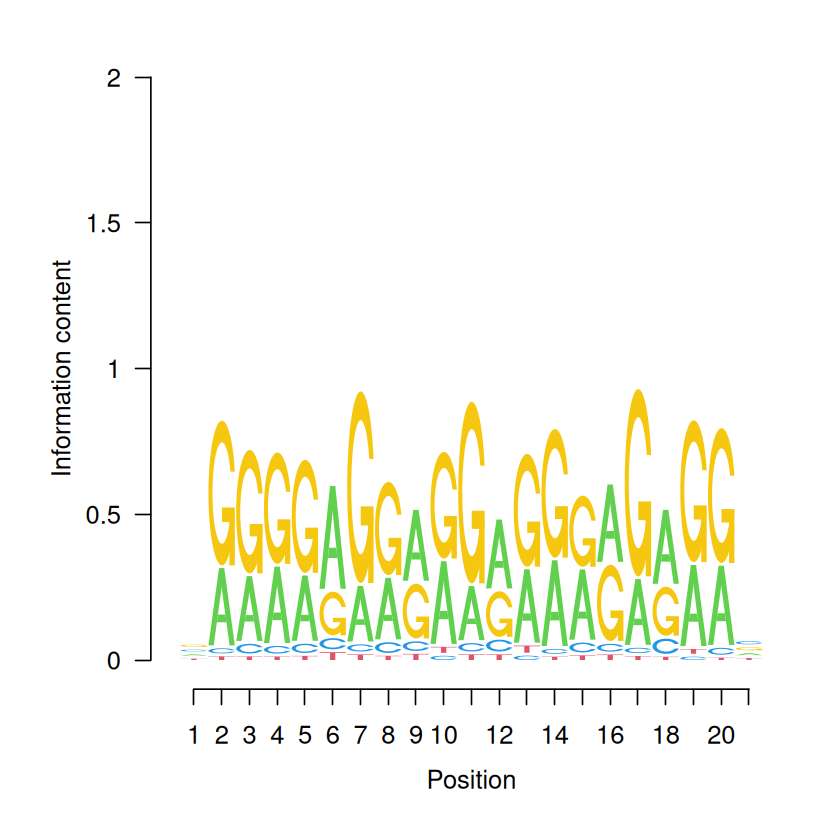

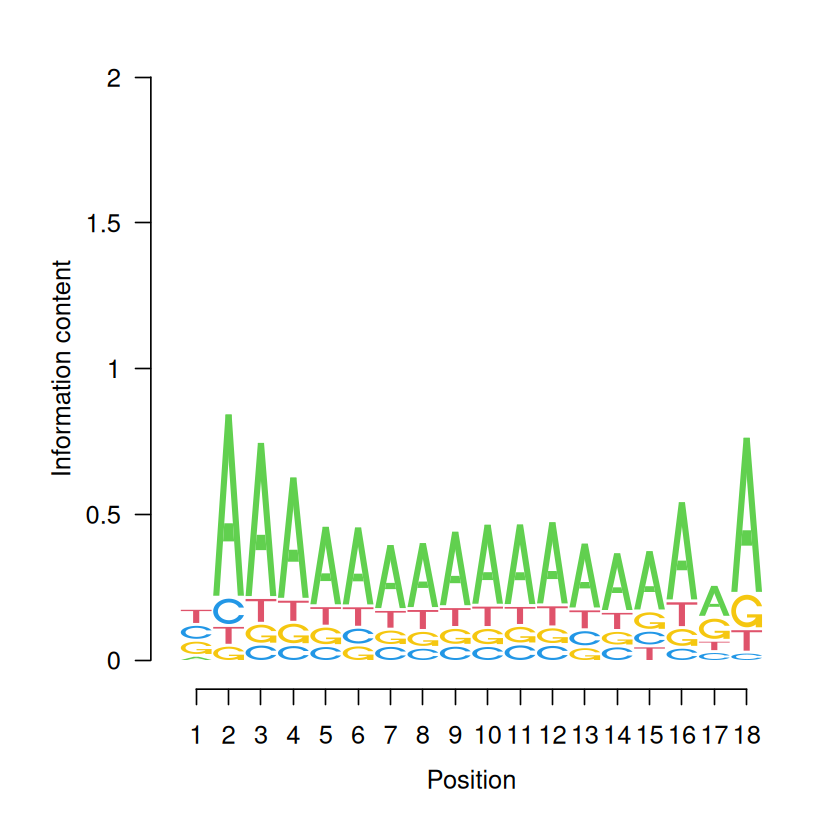

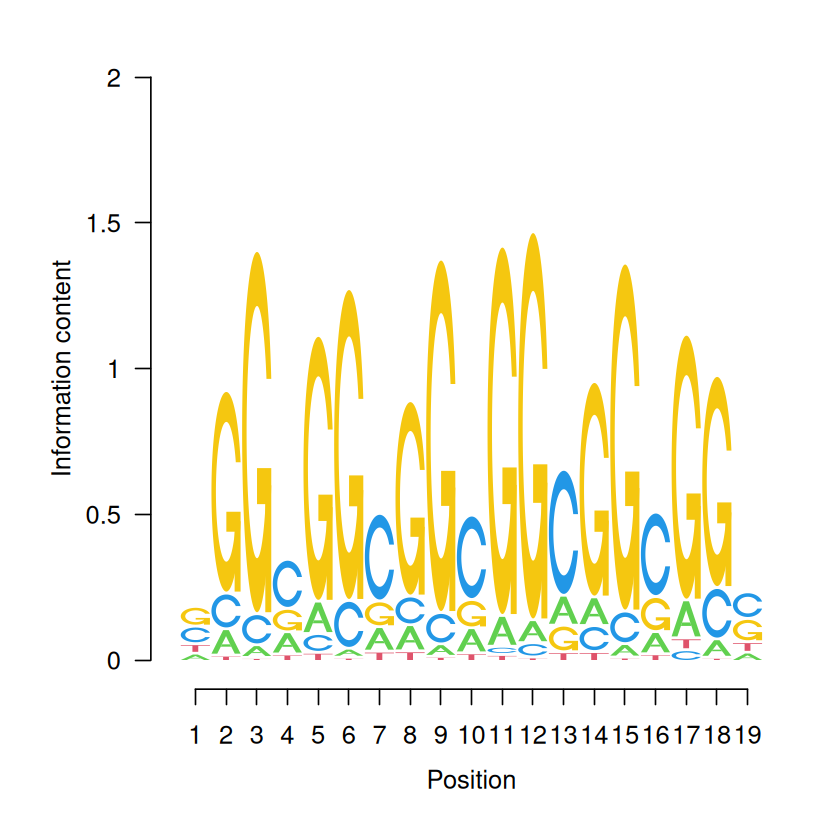

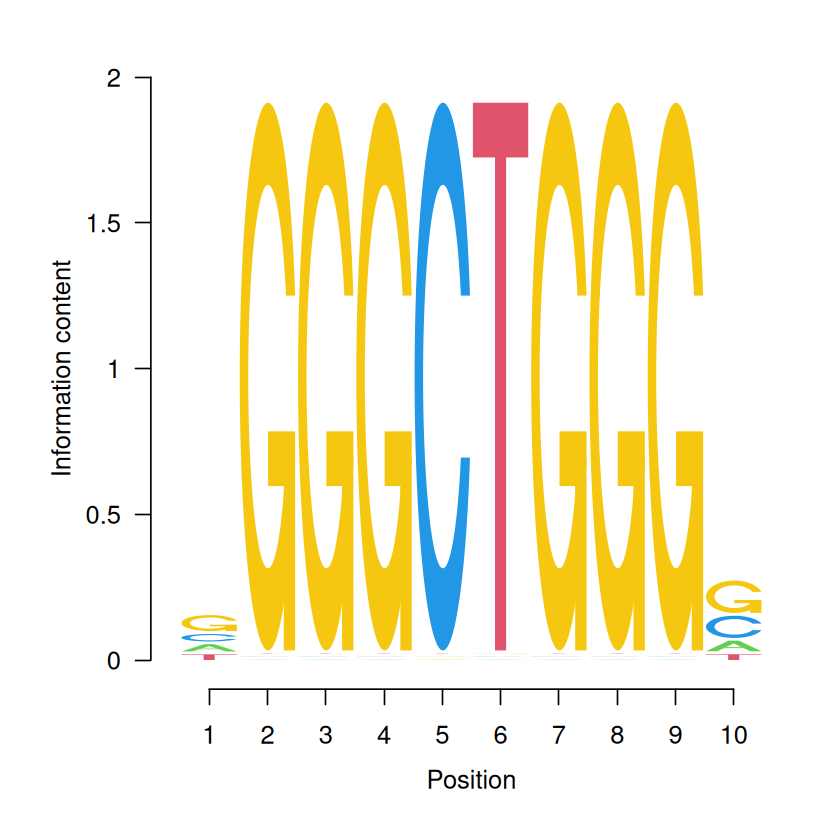

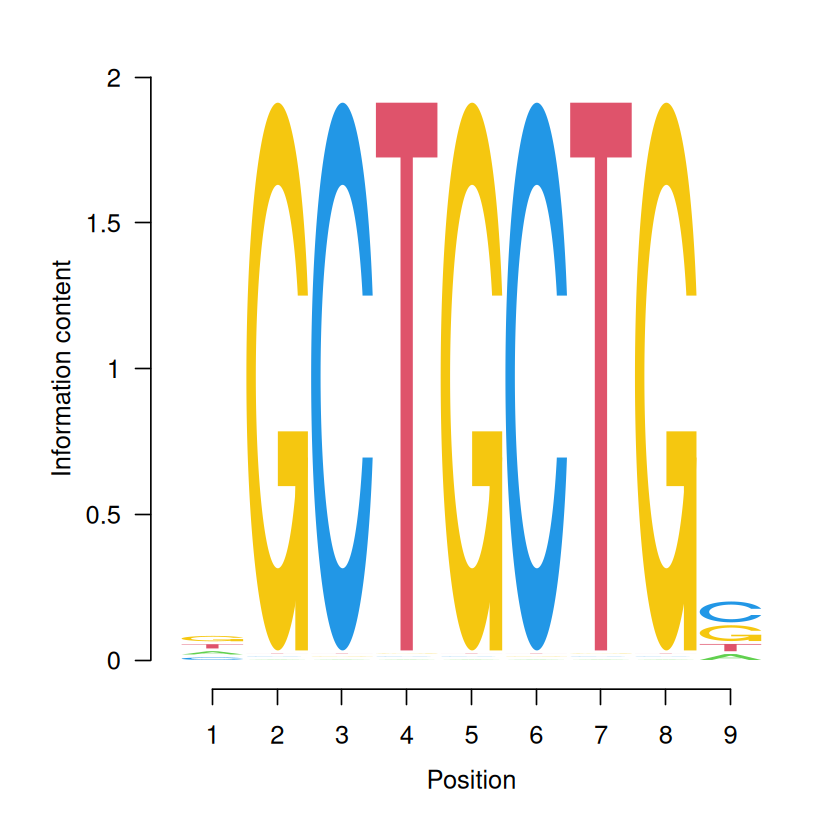

In [11]:
reverse_complement_pwm <- function(pwm) {
  # Reverse the columns (i.e., reverse the motif)
  pwm_rev <- pwm[, ncol(pwm):1]

  # Reorder the rows: A<->T, C<->G
  row_order <- match(c("T", "G", "C", "A"), rownames(pwm_rev))
  pwm_rc <- pwm_rev[row_order, ]
  rownames(pwm_rc) <- c("A", "C", "G", "T")  # restore row names

  return(pwm_rc)
}

seqLogo(pwm_list_down$motif_1)
seqLogo(pwm_list_down$motif_2)
seqLogo(pwm_list_down$motif_3)
seqLogo(reverse_complement_pwm(pwm_list_down$motif_4))
seqLogo(reverse_complement_pwm(pwm_list_down$motif_5))

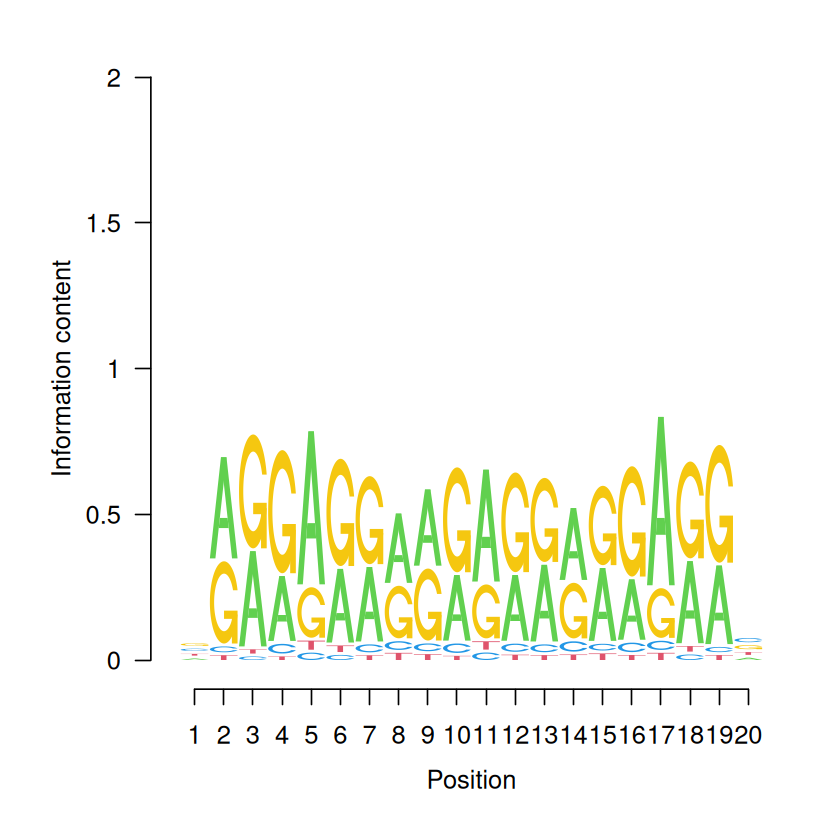

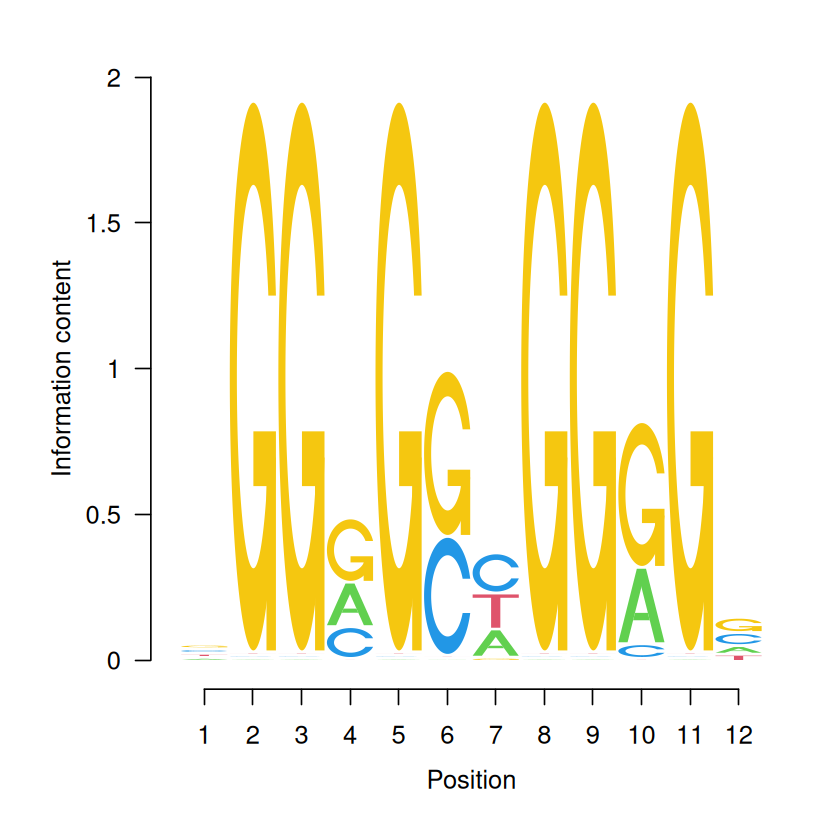

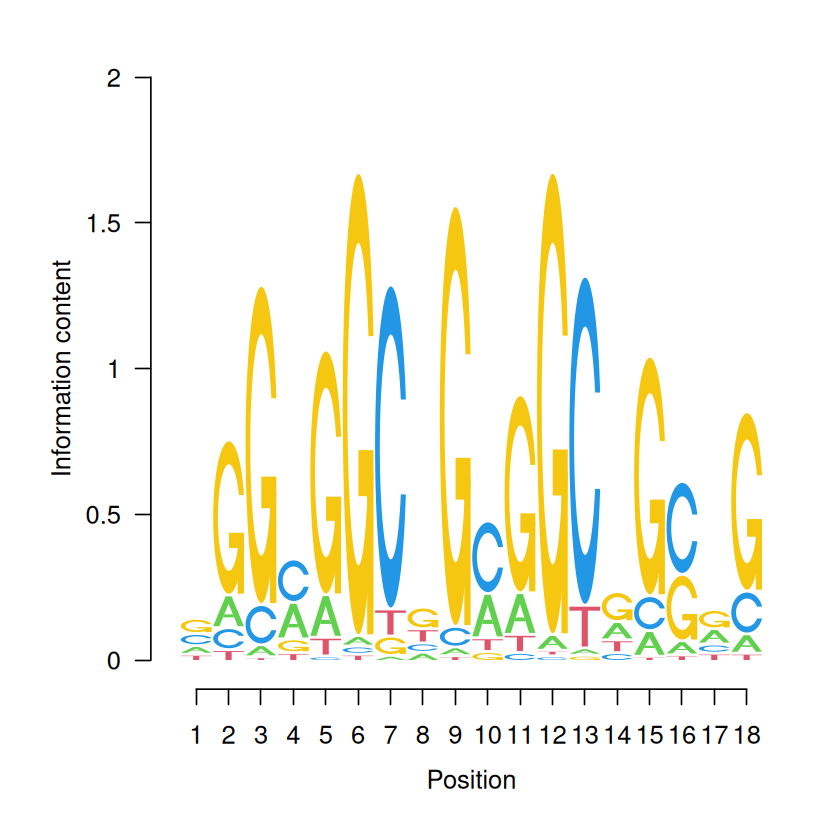

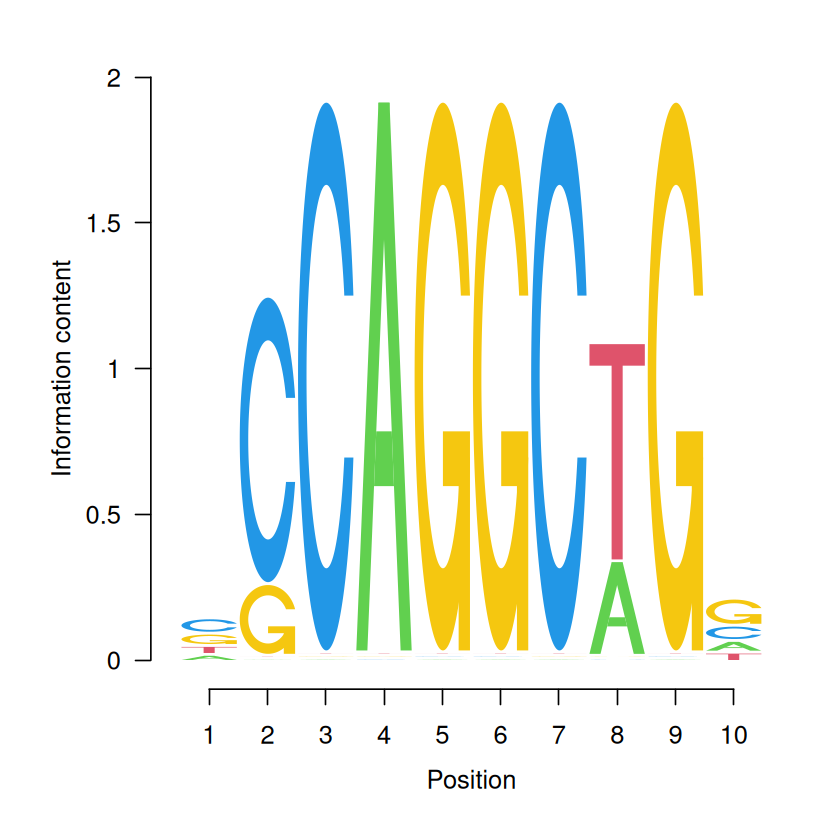

In [25]:
seqLogo(reverse_complement_pwm(pwm_list_up$motif_1))
seqLogo(reverse_complement_pwm(pwm_list_up$motif_2))
seqLogo(reverse_complement_pwm(pwm_list_up$motif_3))
seqLogo(reverse_complement_pwm(pwm_list_up$motif_4))
# seqLogo(pwm_list_up$motif_5)

In [13]:
print("Similarity between motifs by using the statistics in universalmotif library")

[1] "Similarity between motifs by using the statistics in universalmotif library"


In [14]:
library(universalmotif)

# Function to properly convert PWM to universalmotif object
convert_to_universalmotif <- function(pwm_matrix, motif_name) {
    # Ensure the matrix has proper row names
    if(is.null(rownames(pwm_matrix))) {
        rownames(pwm_matrix) <- c("A", "C", "G", "T")
    }
    
    # Create universalmotif object
    create_motif(pwm_matrix, 
                 name = motif_name, 
                 type = "PWM",
                 alphabet = "DNA")
}

# Convert down-regulated motifs
motifs_down_um <- list()
for(motif_name in names(pwm_list_down)) {
    motifs_down_um[[motif_name]] <- convert_to_universalmotif(pwm_list_down[[motif_name]], 
                                                              paste0("Down_", motif_name))
}

# Convert up-regulated motifs  
motifs_up_um <- list()
for(motif_name in names(pwm_list_up)) {
    motifs_up_um[[motif_name]] <- convert_to_universalmotif(pwm_list_up[[motif_name]], 
                                                            paste0("Up_", motif_name))
}

print(paste("Created", length(motifs_down_um), "down-regulated motifs"))
print(paste("Created", length(motifs_up_um), "up-regulated motifs"))

Warning message in (function (motif, name = "new motif", altname = NA_character_, :
“subscript out of bounds (index 0 >= vector size 0)”
Warning message in (function (motif, name = "new motif", altname = NA_character_, :
“subscript out of bounds (index 0 >= vector size 0)”
Warning message in (function (motif, name = "new motif", altname = NA_character_, :
“subscript out of bounds (index 0 >= vector size 0)”
Warning message in (function (motif, name = "new motif", altname = NA_character_, :
“subscript out of bounds (index 0 >= vector size 0)”
Warning message in (function (motif, name = "new motif", altname = NA_character_, :
“subscript out of bounds (index 0 >= vector size 0)”
Warning message in (function (motif, name = "new motif", altname = NA_character_, :
“subscript out of bounds (index 0 >= vector size 0)”
Warning message in (function (motif, name = "new motif", altname = NA_character_, :
“subscript out of bounds (index 0 >= vector size 0)”
Warning message in (function (motif, name

[1] "Created 5 down-regulated motifs"
[1] "Created 4 up-regulated motifs"


In [15]:
# motifs_down_um
# motifs_up_um

In [16]:
# Combine all motifs for comparison
all_motifs_um <- c(motifs_down_um, motifs_up_um)

# Compare all motifs using different methods
comparison_pcc <- compare_motifs(all_motifs_um, method = "PCC")  # Pearson correlation
comparison_euclidean <- compare_motifs(all_motifs_um, method = "EUCL")  # Euclidean distance
comparison_kl <- compare_motifs(all_motifs_um, method = "KL")  # Kullback-Leibler

print("Pearson Correlation Comparison:")
print(round(comparison_pcc, 3))

[1] "Pearson Correlation Comparison:"
             Down_motif_1 Down_motif_2 Down_motif_3 Down_motif_4 Down_motif_5
Down_motif_1        1.000        0.408        0.570        0.513        0.348
Down_motif_2        0.408        1.000       -0.225       -0.089        0.128
Down_motif_3        0.570       -0.225        1.000        0.647        0.670
Down_motif_4        0.513       -0.089        0.647        1.000        0.622
Down_motif_5        0.348        0.128        0.670        0.622        1.000
Up_motif_1          0.934        0.550        0.482        0.393        0.330
Up_motif_2          0.684       -0.106        0.753        0.816        0.441
Up_motif_3          0.664       -0.095        0.949        0.621        0.695
Up_motif_4          0.390       -0.037        0.432        0.663        0.781
             Up_motif_1 Up_motif_2 Up_motif_3 Up_motif_4
Down_motif_1      0.934      0.684      0.664      0.390
Down_motif_2      0.550     -0.106     -0.095     -0.037
Down_motif_

In [17]:
# Get indices for down and up motifs
num_down <- length(motifs_down_um)
num_up <- length(motifs_up_um)

# Extract cross-comparison (down vs up only)
down_vs_up_comparison <- comparison_pcc[1:num_down, (num_down + 1):(num_down + num_up)]

print("\nDown vs Up Motif Similarity Matrix:")
print(round(down_vs_up_comparison, 3))

# Set proper row and column names
rownames(down_vs_up_comparison) <- names(motifs_down_um)
colnames(down_vs_up_comparison) <- names(motifs_up_um)

[1] "\nDown vs Up Motif Similarity Matrix:"
             Up_motif_1 Up_motif_2 Up_motif_3 Up_motif_4
Down_motif_1      0.934      0.684      0.664      0.390
Down_motif_2      0.550     -0.106     -0.095     -0.037
Down_motif_3      0.482      0.753      0.949      0.432
Down_motif_4      0.393      0.816      0.621      0.663
Down_motif_5      0.330      0.441      0.695      0.781


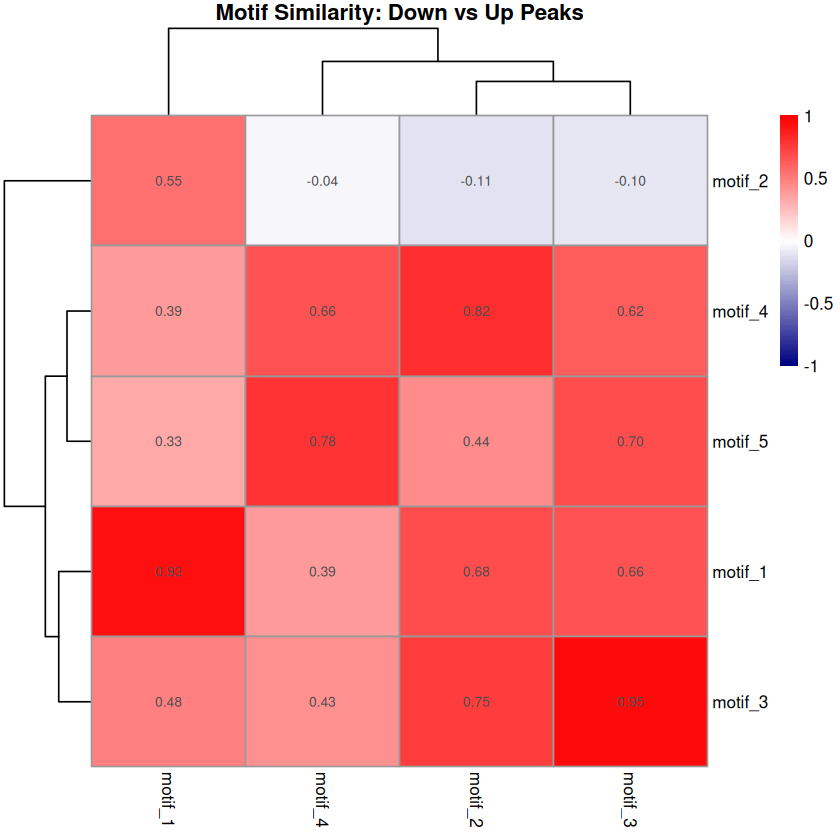

In [18]:
library(pheatmap)
library(RColorBrewer)

# Create heatmap
pheatmap(down_vs_up_comparison,
         main = "Motif Similarity: Down vs Up Peaks",
         color = colorRampPalette(c("navy", "white", "red"))(100),
         cluster_rows = TRUE,
         cluster_cols = TRUE,
         display_numbers = TRUE,
         number_format = "%.2f",
         fontsize_number = 8,
         breaks = seq(-1, 1, length.out = 101))

In [19]:
# Convert matrix to data frame for easier analysis
similarity_df <- expand.grid(Down_Motif = rownames(down_vs_up_comparison),
                            Up_Motif = colnames(down_vs_up_comparison),
                            stringsAsFactors = FALSE)

similarity_df$Similarity <- as.vector(down_vs_up_comparison)

# Sort by similarity
similarity_df <- similarity_df[order(similarity_df$Similarity, decreasing = TRUE), ]

print("Top 10 most similar motif pairs between conditions:")
print(head(similarity_df, 10))

print("\nTop 5 least similar motif pairs:")
print(tail(similarity_df, 5))

[1] "Top 10 most similar motif pairs between conditions:"
   Down_Motif Up_Motif Similarity
13    motif_3  motif_3  0.9489896
1     motif_1  motif_1  0.9343728
9     motif_4  motif_2  0.8162254
20    motif_5  motif_4  0.7807379
8     motif_3  motif_2  0.7533735
15    motif_5  motif_3  0.6952674
6     motif_1  motif_2  0.6839383
11    motif_1  motif_3  0.6643180
19    motif_4  motif_4  0.6628679
14    motif_4  motif_3  0.6209201
[1] "\nTop 5 least similar motif pairs:"
   Down_Motif Up_Motif  Similarity
16    motif_1  motif_4  0.39001201
5     motif_5  motif_1  0.32965926
17    motif_2  motif_4 -0.03652460
12    motif_2  motif_3 -0.09507172
7     motif_2  motif_2 -0.10613018


In [20]:
# Calculate summary statistics
summary_stats <- data.frame(
    Metric = c("Mean Similarity", "Max Similarity", "Min Similarity", 
               "Std Dev", "Pairs > 0.5", "Pairs > 0.7"),
    Value = c(
        round(mean(similarity_df$Similarity), 3),
        round(max(similarity_df$Similarity), 3),
        round(min(similarity_df$Similarity), 3),
        round(sd(similarity_df$Similarity), 3),
        sum(similarity_df$Similarity > 0.5),
        sum(similarity_df$Similarity > 0.7)
    )
)

print("Similarity Summary Statistics:")
print(summary_stats)

[1] "Similarity Summary Statistics:"
           Metric  Value
1 Mean Similarity  0.517
2  Max Similarity  0.949
3  Min Similarity -0.106
4         Std Dev  0.311
5     Pairs > 0.5 11.000
6     Pairs > 0.7  5.000


In [21]:
print("Similarity between motifs by using the statistics in motifstack library")

[1] "Similarity between motifs by using the statistics in motifstack library"


In [22]:

# Pearson Correlation of two PWMs (allow alignment)
pwm_similarity <- function(pwm1, pwm2) {
  min_len <- min(ncol(pwm1), ncol(pwm2))
  pwm1_trim <- pwm1[, 1:min_len]
  pwm2_trim <- pwm2[, 1:min_len]

  # Flatten the matrices into vectors and correlate
  cor(as.vector(pwm1_trim), as.vector(pwm2_trim))
}

In [23]:
# Create an empty matrix to store pairwise similarities
similarity_matrix <- matrix(NA, 
                            nrow = length(pwm_list_up), 
                            ncol = length(pwm_list_down),
                            dimnames = list(names(pwm_list_up), names(pwm_list_down)))

# Fill in the matrix
for (i in names(pwm_list_up)) {
  for (j in names(pwm_list_down)) {
    pwm_up <- pwm_list_up[[i]]
    pwm_down <- reverse_complement_pwm(pwm_list_down[[j]])  # reverse-complement down motifs
    similarity_matrix[i, j] <- pwm_similarity(pwm_up, pwm_down)
  }
}

# View matrix
print(round(similarity_matrix, 3))


        motif_1 motif_2 motif_3 motif_4 motif_5
motif_1   0.929   0.461   0.492  -0.225   0.213
motif_2   0.604  -0.197   0.596   0.005  -0.235
motif_3   0.242  -0.239   0.200  -0.021  -0.265
motif_4   0.182  -0.087   0.355   0.325   0.248


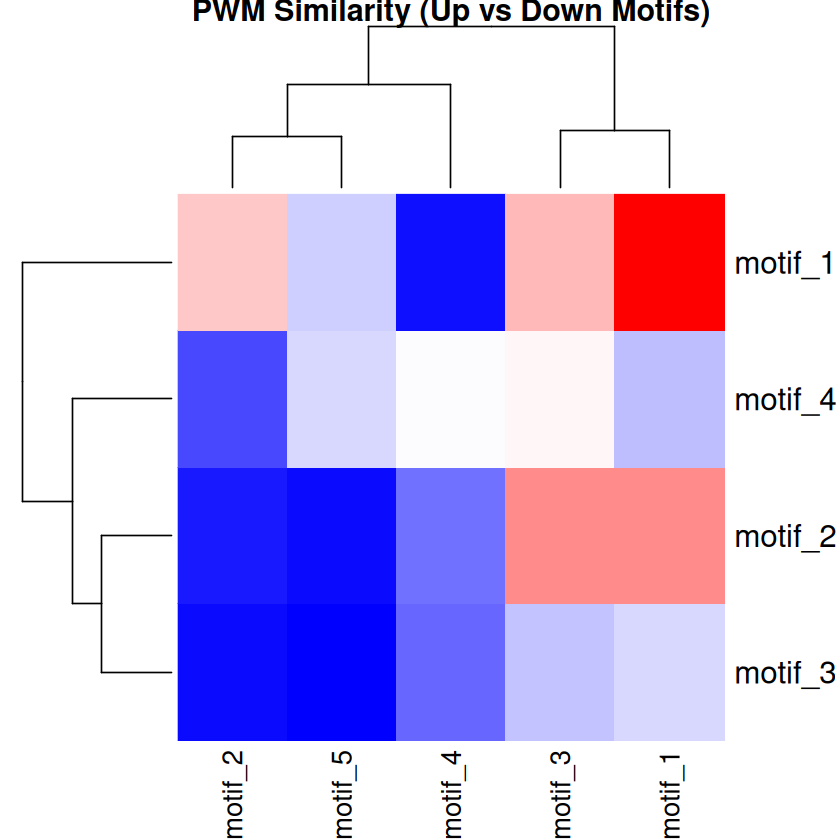

In [24]:
heatmap(similarity_matrix, 
        main = "PWM Similarity (Up vs Down Motifs)", 
        col = colorRampPalette(c("blue", "white", "red"))(100), 
        scale = "none")